# Семинар 6: Seaborn

<a href="https://colab.research.google.com/github/SergeyMalashenko/MachineLearning_Summer_2023/blob/main/seminars/5/seminar_5_Seaborn.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

Matplotlib уже несколько десятилетий является основой научной визуализации на языке Python, но пользователи признают, что работа с Matplotlib является достаточно трудоемкой.

- Matplotlib API относительно низкоуровневый. Выполнение сложной статистической визуализации возможно, но часто требует большого объема программного кода.
- Matplotlib предшествовал Pandas более чем на десятилетие, и поэтому не предназначен для использования с объектами Pandas `DataFrame`. Чтобы визуализировать данные из `DataFrame`, вы должны извлечь каждую `Series` и часто конкатенировать их вместе в нужный формат. Было бы лучше иметь библиотеку, которая может разумно использовать метки `DataFrame` в графике.

Ответом на эти проблемы является [Seaborn](http://seaborn.pydata.org/). Seaborn предоставляет API поверх Matplotlib, который предлагает разумный выбор стиля графика и цветов по умолчанию, определяет простые высокоуровневые функции для общих типов статистических графиков и интегрируется с функциональностью, предоставляемой Pandas.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set()  # seaborn's method to set its chart style

### Histograms, KDE, and Densities (Гистограммы, Ядерные оценки плотности распределения, Плотность распределения)

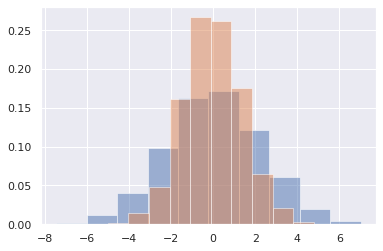

In [3]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

Маргинальные распределения `p(x), p(y)`

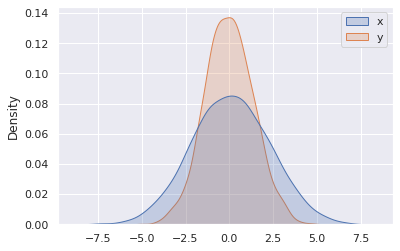

In [4]:
sns.kdeplot(data=data, shade=True);

Совместное распределение `p(x,y)`

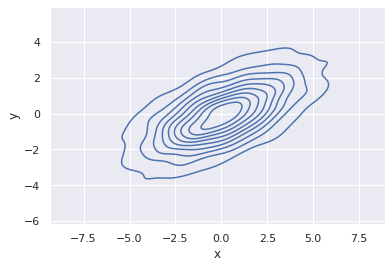

In [5]:
sns.kdeplot(data=data, x='x', y='y');

### Pair Plots (Парные графики)

In [6]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


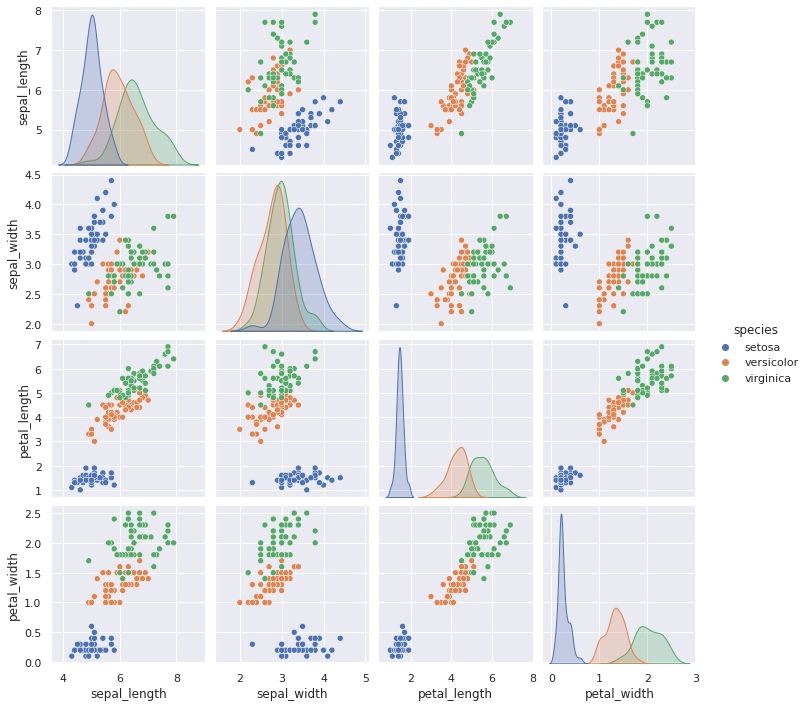

In [7]:
sns.pairplot(iris, hue='species', height=2.5);

### Faceted Histograms

In [8]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


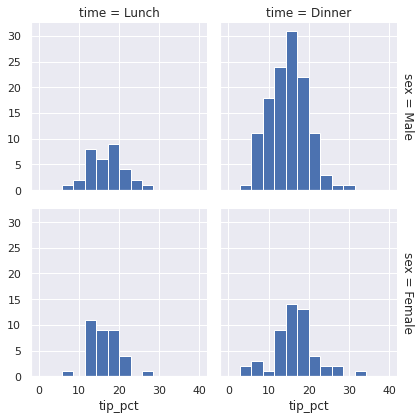

In [9]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Categorical Plots (Категориальные графики)

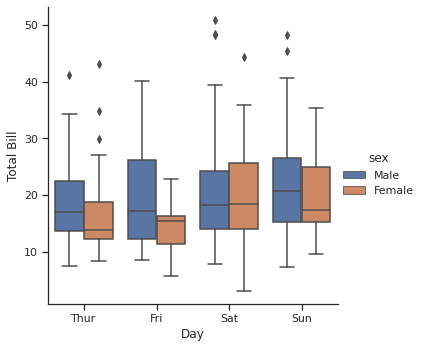

In [11]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

### Joint Distributions (Совместное распределение)

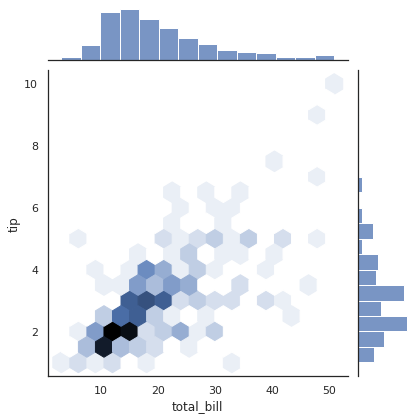

In [14]:
with sns.axes_style('white'):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

`jointplot` может также выполнять автоматическую ядерную оценку плотности и строить линейную регрессию:

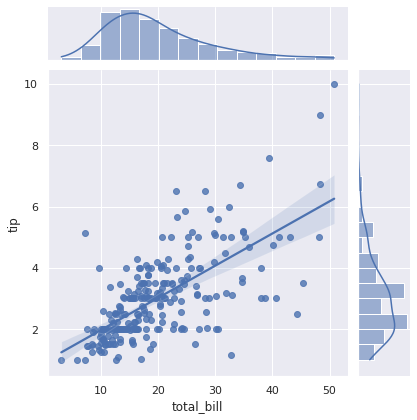

In [13]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg');

### Bar Plot (Столбчатая диаграмма)

In [15]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


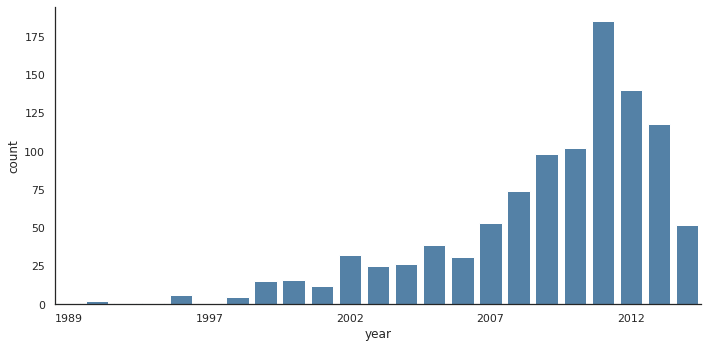

In [16]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=2,
                    kind="count", color='steelblue')
    g.set_xticklabels(step=5)

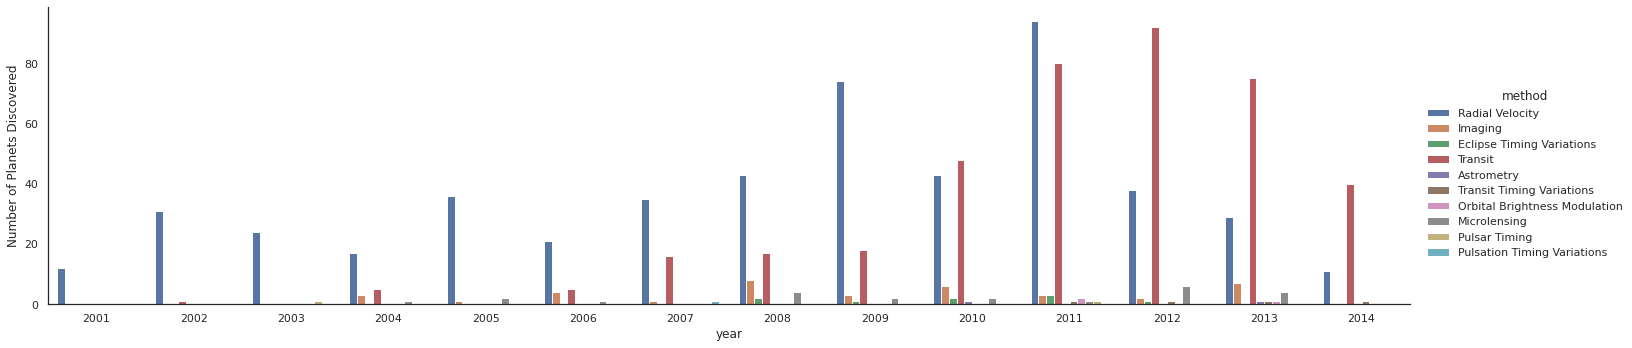

In [17]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=4.0, kind='count',
                    hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')